# Decision Trees
Within this challenge, we're going to use decision trees in both a classification sense and a regression sense and visualize each of these representations. In this challenge, we will be using the `mpg` dataset.

## Regression Trees

In [33]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

data = sns.load_dataset("mpg")

# Drop the rows with missing values
data.dropna(inplace = True)
# Drop the "name" column
data.drop('name', axis = 1, inplace = True)
# Transform the "origin" column to represent the following:
#   USA = 0, Japan = 1, Europe = 2
data['origin'] = data['origin'].apply(lambda x: 0 if x == 'usa' else 1 if x == 'japan' else 2 )

# INSERT CODE HERE
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0


In [34]:
# Split into train and test splits using the "mpg" column as target, random state of 42 and a test size of 20%
# INSERT CODE HERE
data = pd.get_dummies(data, columns = ['origin'])

X = data.iloc[:,1:]
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.80)

In [49]:
# Fit a decision tree
# INSERT CODE HERE
modelDTR = DecisionTreeRegressor(max_depth = 4)

modelDTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [51]:
# Predict on the xtest set
# INSERT CODE HERE
modelDTR.predict(X_test)

array([25.42857143, 19.71666667, 37.10769231, 30.78125   , 25.80833333,
       25.42857143, 12.80434783, 32.06888889, 18.225     , 30.78125   ,
       14.44444444, 19.71666667, 15.88888889, 25.42857143, 19.71666667,
       29.85      , 19.71666667, 32.06888889, 32.06888889, 29.85      ,
       19.71666667, 32.06888889, 37.10769231, 14.44444444, 30.78125   ,
       23.84594595, 19.71666667, 18.225     , 30.78125   , 25.42857143,
       12.80434783, 20.87777778, 20.87777778, 32.06888889, 12.80434783,
       37.10769231, 12.80434783, 25.42857143, 14.44444444, 12.80434783,
       14.44444444, 25.42857143, 32.06888889, 25.42857143, 12.80434783,
       12.80434783, 18.225     , 37.10769231, 25.42857143, 30.78125   ,
       14.44444444, 23.84594595, 23.84594595, 29.85      , 38.        ,
       18.225     , 18.225     , 18.225     , 23.84594595, 23.84594595,
       12.80434783, 18.225     , 29.85      , 19.71666667, 23.84594595,
       25.42857143, 23.84594595, 30.78125   , 20.87777778, 14.44

In [50]:
# Print out the R2 score.
# INSERT CODE HERE
print(f"score Train = {modelDTR.score(X_train, y_train)}, score Test = {modelDTR.score(X_test, y_test)}")

score Train = 0.8930716698139086, score Test = 0.7714042734361117


In [59]:
# Print each feature with importance %
# INSERT CODE HERE
features = pd.DataFrame(modelDTR.feature_importances_.reshape(1,9), columns = X.columns)
features

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_0,origin_1,origin_2
0,0.0,0.687101,0.184578,0.030626,0.0,0.097695,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


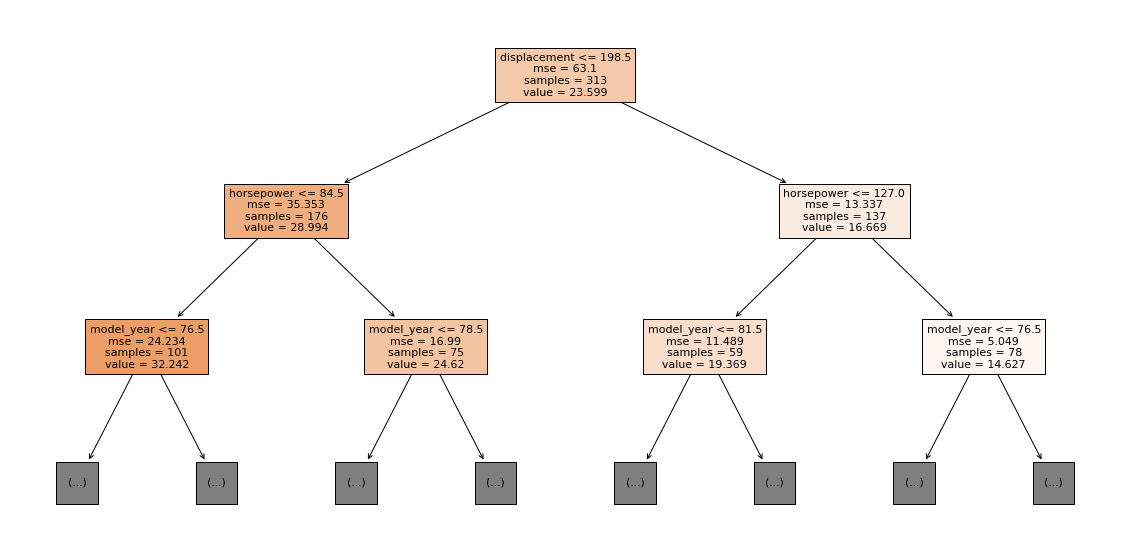

In [62]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE

plt.figure(figsize = (20,10))
tree.plot_tree(modelDTR, 
          filled = True,  
          class_names = modelDTR.classes_, 
          feature_names=X.columns,
          max_depth = 2)

plt.show()

## Classification Trees

In [65]:
# Load in the Penguins dataset
data = sns.load_dataset('penguins')

# Drop rows with missing values
data.dropna(inplace = True)
# Turn the species column into numeric
# Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
data['species'] = data['species'].apply(lambda x: 0 if x == 'Adelie' else 1 if x == 'Chinstrap' else 2 )
# Turn the island column into numeric
# Specifically, Torgersen = 0, Biscoe = 1, Dream = 2
data['island'] = data['island'].apply(lambda x: 0 if x == 'Torgersen' else 1 if x == 'Biscoe' else 2 )
# INSERT CODE HERE


In [66]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,Male
1,0,0,39.5,17.4,186.0,3800.0,Female
2,0,0,40.3,18.0,195.0,3250.0,Female
4,0,0,36.7,19.3,193.0,3450.0,Female
5,0,0,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,2,1,47.2,13.7,214.0,4925.0,Female
340,2,1,46.8,14.3,215.0,4850.0,Female
341,2,1,50.4,15.7,222.0,5750.0,Male
342,2,1,45.2,14.8,212.0,5200.0,Female


In [68]:
# Using a random state of 42 and a test size of 0.20, as well as "sex" as the output, split in training and testing sets
# INSERT CODE HERE
X = data.iloc[:,:-1]
y = data['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.80)

In [73]:
# Using a random state of 42, fit the classification tree.
# INSERT CODE HERE
modelDTC = DecisionTreeClassifier(max_depth = 4)
modelDTC.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
# Print the predictions on the test set
# INSERT CODE HERE
modelDTC.predict(X_test)

array(['Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Female'], dtype=object)

In [74]:
# Print the accuracy score for the predictions
# INSERT CODE HERE
print(f"score Train = {modelDTC.score(X_train, y_train)}, score Test = {modelDTC.score(X_test, y_test)}")

score Train = 0.9360902255639098, score Test = 0.8656716417910447


In [75]:
# Print each feature with importance %
# INSERT CODE HERE
features = pd.DataFrame(modelDTC.feature_importances_.reshape(1,6), columns = X.columns)
features

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.0,0.0,0.072488,0.556008,0.0,0.371505


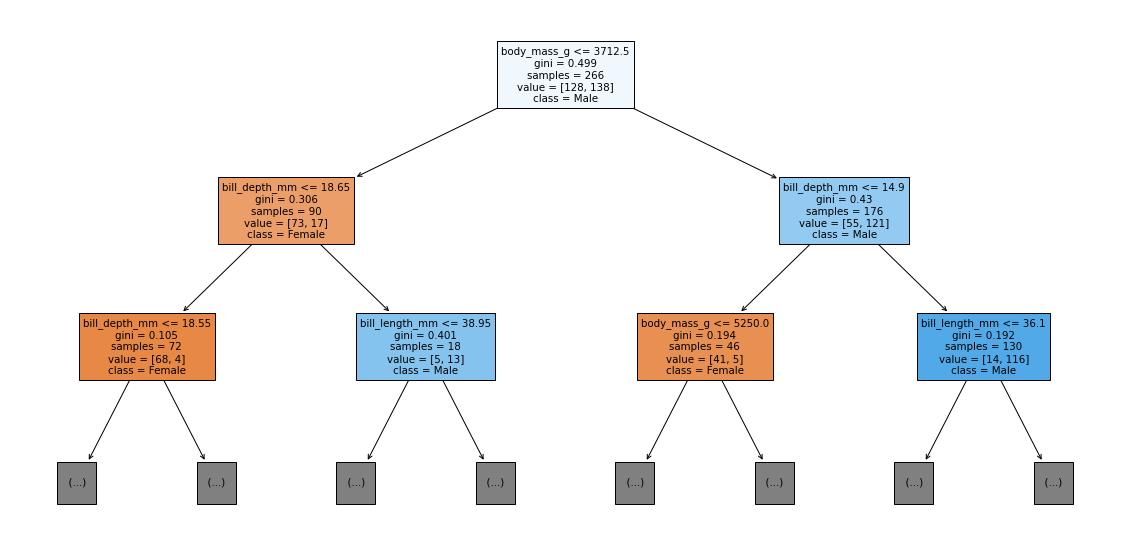

In [76]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE
plt.figure(figsize = (20,10))
tree.plot_tree(modelDTC, 
          filled = True,  
          class_names = modelDTC.classes_, 
          feature_names=X.columns,
          max_depth = 2)

plt.show()

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!*** Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).


Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.

In [92]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies = []
for i in range(1, 11):
  modelDTC = DecisionTreeClassifier(max_depth = i)
  modelDTC.fit(X_train, y_train)
  modelDTC.predict(X_test)
  list_of_accuracies.append(modelDTC.score(X_test, y_test))
  print(f"for max_depth = {i} : score Train = {modelDTC.score(X_train, y_train)}, score Test = {modelDTC.score(X_test, y_test)}")
print(list_of_accuracies)


for max_depth = 1 : score Train = 0.7293233082706767, score Test = 0.7014925373134329
for max_depth = 2 : score Train = 0.8947368421052632, score Test = 0.8208955223880597
for max_depth = 3 : score Train = 0.9285714285714286, score Test = 0.835820895522388
for max_depth = 4 : score Train = 0.9360902255639098, score Test = 0.8656716417910447
for max_depth = 5 : score Train = 0.9586466165413534, score Test = 0.8507462686567164
for max_depth = 6 : score Train = 0.9736842105263158, score Test = 0.835820895522388
for max_depth = 7 : score Train = 0.9887218045112782, score Test = 0.8507462686567164
for max_depth = 8 : score Train = 0.9924812030075187, score Test = 0.835820895522388
for max_depth = 9 : score Train = 0.9962406015037594, score Test = 0.8656716417910447
for max_depth = 10 : score Train = 0.9962406015037594, score Test = 0.8805970149253731
[0.7014925373134329, 0.8208955223880597, 0.835820895522388, 0.8656716417910447, 0.8507462686567164, 0.835820895522388, 0.8507462686567164, 0.8

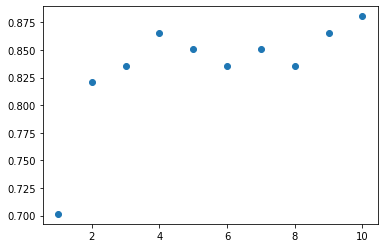

In [93]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
# INSERT CODE HERE

plt.scatter(range(1,11), list_of_accuracies)